In [34]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [98]:
df_train = pd.read_csv("Data/train.csv")
df_train.index = df_train["id"]
df_train.drop(columns="id", axis=0, inplace=True)
df_train

,date,store_nbr,family,sales,onpromotion
id,,,,,
0,2013-01-01,1,AUTOMOTIVE,0.000,0
1,2013-01-01,1,BABY CARE,0.000,0
2,2013-01-01,1,BEAUTY,0.000,0
3,2013-01-01,1,BEVERAGES,0.000,0
4,2013-01-01,1,BOOKS,0.000,0
...,...,...,...,...,...
3000883,2017-08-15,9,POULTRY,438.133,0
3000884,2017-08-15,9,PREPARED FOODS,154.553,1
3000885,2017-08-15,9,PRODUCE,2419.729,148


In [99]:
# Analyze the types
df_train.info(verbose=True, show_counts=True)

# We are lucky, there is no empty cell

<class 'pandas.core.frame.DataFrame'>
Index: 3000888 entries, 0 to 3000887
Data columns (total 5 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   date         3000888 non-null  object 
 1   store_nbr    3000888 non-null  int64  
 2   family       3000888 non-null  object 
 3   sales        3000888 non-null  float64
 4   onpromotion  3000888 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 137.4+ MB


In [100]:
# Date
df_train["date"] = df_train["date"].astype("datetime64[ns]")
df_train["date"].describe()

count                          3000888
mean     2015-04-24 08:27:04.703088384
min                2013-01-01 00:00:00
25%                2014-02-26 18:00:00
50%                2015-04-24 12:00:00
75%                2016-06-19 06:00:00
max                2017-08-15 00:00:00
Name: date, dtype: object

In [101]:
# Stores
# store_nbr identifies the store at which the products are sold.
df_train["store_nbr"].sort_values().unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54])

In [102]:
df_stores = pd.read_csv("Data/stores.csv")
df_stores

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4
5,6,Quito,Pichincha,D,13
6,7,Quito,Pichincha,D,8
7,8,Quito,Pichincha,D,8
8,9,Quito,Pichincha,B,6
9,10,Quito,Pichincha,C,15


In [103]:
# Family
# family identifies the type of product sold.
df_train["family"].unique()

array(['AUTOMOTIVE', 'BABY CARE', 'BEAUTY', 'BEVERAGES', 'BOOKS',
       'BREAD/BAKERY', 'CELEBRATION', 'CLEANING', 'DAIRY', 'DELI', 'EGGS',
       'FROZEN FOODS', 'GROCERY I', 'GROCERY II', 'HARDWARE',
       'HOME AND KITCHEN I', 'HOME AND KITCHEN II', 'HOME APPLIANCES',
       'HOME CARE', 'LADIESWEAR', 'LAWN AND GARDEN', 'LINGERIE',
       'LIQUOR,WINE,BEER', 'MAGAZINES', 'MEATS', 'PERSONAL CARE',
       'PET SUPPLIES', 'PLAYERS AND ELECTRONICS', 'POULTRY',
       'PREPARED FOODS', 'PRODUCE', 'SCHOOL AND OFFICE SUPPLIES',
       'SEAFOOD'], dtype=object)

Note: Consider doing a clustering analysis by cluster and by family!

count    3.000888e+06
mean     3.577757e+02
std      1.101998e+03
min      0.000000e+00
25%      0.000000e+00
50%      1.100000e+01
75%      1.958473e+02
max      1.247170e+05
Name: sales, dtype: float64


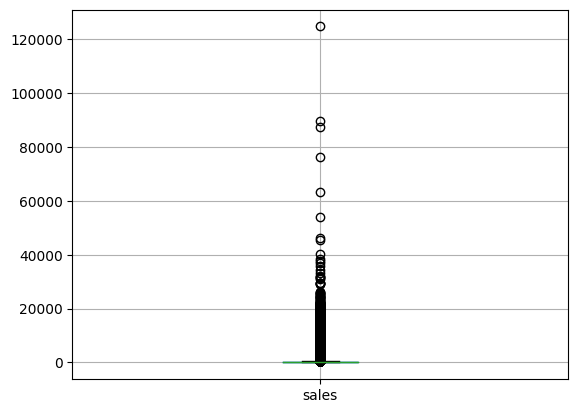

In [45]:
# Sales
# sales gives the total sales for a product family at a particular store at a given date. 
# Fractional values are possible since products can be sold in fractional units (1.5 kg of cheese, for instance, as opposed to 1 bag of chips).
print(df_train["sales"].describe())
df_train[["sales"]].boxplot();

count    3.000888e+06
mean     2.602770e+00
std      1.221888e+01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      7.410000e+02
Name: onpromotion, dtype: float64


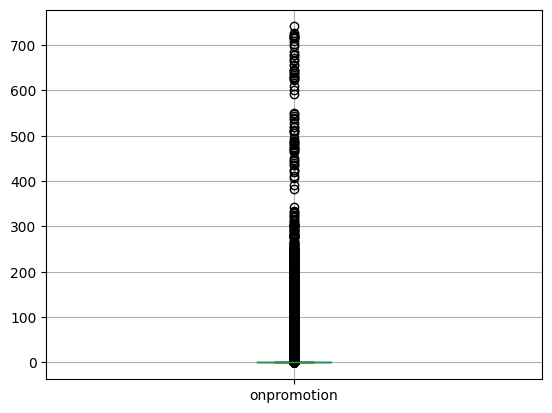

In [44]:
# Onpromotion
# onpromotion gives the total number of items in a product family that were being promoted at a store at a given date.
print(df_train["onpromotion"].describe())
df_train[["onpromotion"]].boxplot();